# Clustering Algorithmen

In diesem Notebook wird kurz die Anwendung von k-means-Clustering und DBScan an einem Toy-Datensatz gezeigt.

### Daten erstellen

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

n_samples=2000
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Plot der erzeugten Datenpunkte:

In [2]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

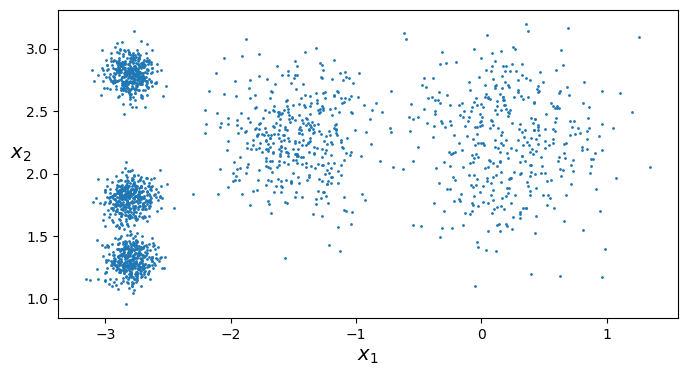

In [3]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### K-Means Clustering
Wir erstellen ein Clustering der Daten mit k-means für $k=4$ und berechnen den Silhouette-Score:

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X);

/Users/pbaier/miniconda3/envs/ml-course-ws23/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusterzugehörigkeit der Datenpunkte: [1 1 2 ... 3 2 1]


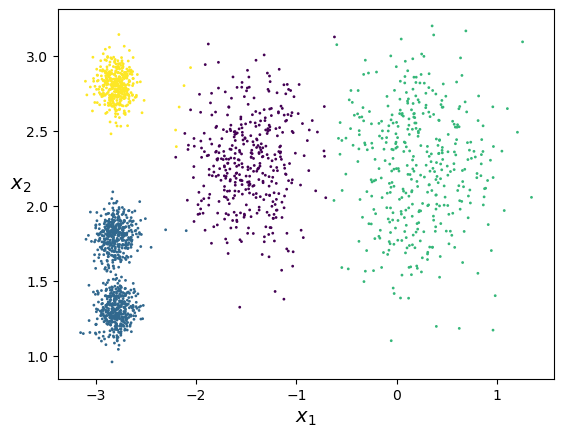

In [5]:
print("Clusterzugehörigkeit der Datenpunkte:", kmeans.labels_)
plot_clusters(X, kmeans.labels_)

In [6]:
from sklearn.metrics import silhouette_score
s_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette-Score for k=4 is {s_score}")

Silhouette-Score for k=4 is 0.688531617595759


In [7]:
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    s_score = silhouette_score(X, kmeans.labels_)
    print(f"Silhouette-Score for k={i} is {s_score}")

Silhouette-Score for k=2 is 0.5966442557582528
Silhouette-Score for k=3 is 0.5723900247411775


/Users/pbaier/miniconda3/envs/ml-course-ws23/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pbaier/miniconda3/envs/ml-course-ws23/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pbaier/miniconda3/envs/ml-course-ws23/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette-Score for k=4 is 0.688531617595759
Silhouette-Score for k=5 is 0.655517642572828
Silhouette-Score for k=6 is 0.6020248775444942


/Users/pbaier/miniconda3/envs/ml-course-ws23/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pbaier/miniconda3/envs/ml-course-ws23/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pbaier/miniconda3/envs/ml-course-ws23/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette-Score for k=7 is 0.6068660656395705
Silhouette-Score for k=8 is 0.5616749495602119


/Users/pbaier/miniconda3/envs/ml-course-ws23/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pbaier/miniconda3/envs/ml-course-ws23/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette-Score for k=9 is 0.5670994891020925


### DBSCAN Clustering

Nun clustern wir die Daten mit dem DBScan-Algorithmus:

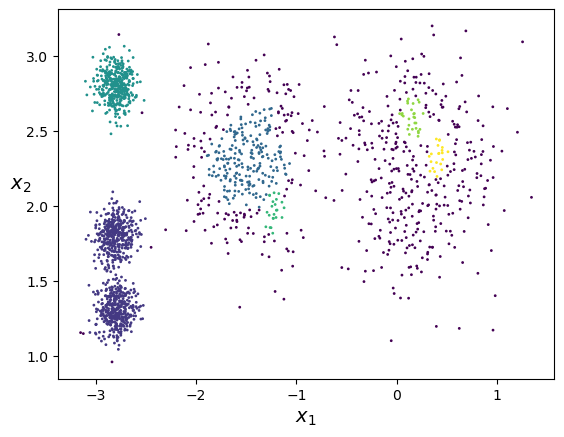

In [11]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=15)
dbscan.fit(X)
plot_clusters(X, dbscan.labels_)